In [1]:
import numpy as np

In [2]:
def sample(dim):
  return np.random.rand(100, dim)

In [3]:
means_l1 = np.zeros(11)
stds_l1 = np.zeros(11)

means_l2 = np.zeros(11)
stds_l2 = np.zeros(11)
for i in np.arange(11):
  data = sample(2 ** i)
  l2 = np.array([])
  l1 = np.array([])

  for y in data:
    for x in data:
      l1 = np.append(l1, np.linalg.norm(y-x, 1))
      l2 = np.append(l2, np.linalg.norm(y-x, 2))

  means_l1[i] = np.mean(l1)
  stds_l1[i] = np.std(l1)
  means_l2[i] = np.mean(l2)
  stds_l2[i] = np.std(l2)

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(means_l1, stds_l1)

[3.09587159e-01 6.85972316e-01 1.34089803e+00 2.69353881e+00
 5.20178069e+00 1.05596905e+01 2.12679480e+01 4.19560096e+01
 8.46435883e+01 1.68906461e+02 3.37468015e+02] [ 0.22391194  0.35158856  0.48522083  0.71674638  1.04818287  1.69739332
  2.83557537  4.96969324  9.30359884 17.76696558 34.67476827]


<function matplotlib.pyplot.show(*args, **kw)>

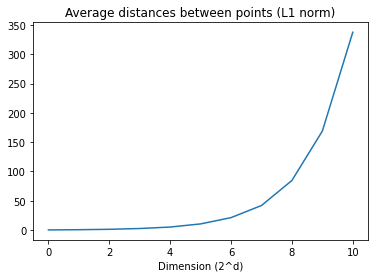

In [6]:
# Average l1 plot
plt.plot(means_l1)
plt.title("Average distances between points (L1 norm)")
plt.xlabel("Dimension (2^d)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

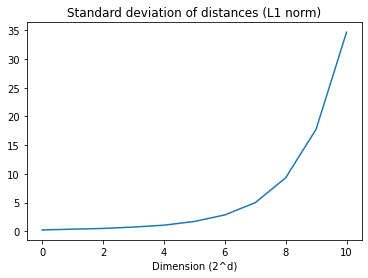

In [7]:
# Std l1 plot
plt.plot(stds_l1)
plt.title("Standard deviation of distances (L1 norm)")
plt.xlabel("Dimension (2^d)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

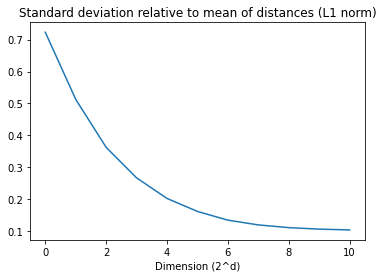

In [8]:
# Std/mean l1
plt.plot(stds_l1 / means_l1)
plt.title("Standard deviation relative to mean of distances (L1 norm)")
plt.xlabel("Dimension (2^d)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

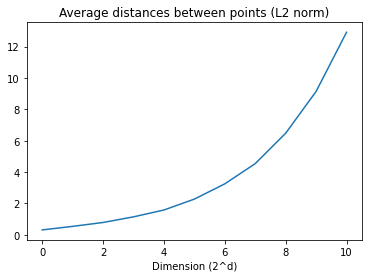

In [9]:
# Average l2 plot
plt.plot(means_l2)
plt.title("Average distances between points (L2 norm)")
plt.xlabel("Dimension (2^d)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

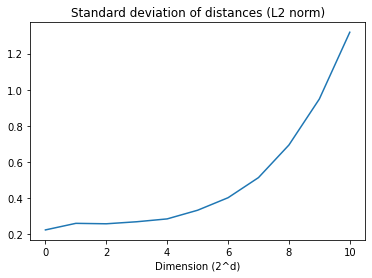

In [10]:
# Std l1 plot
plt.plot(stds_l2)
plt.title("Standard deviation of distances (L2 norm)")
plt.xlabel("Dimension (2^d)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

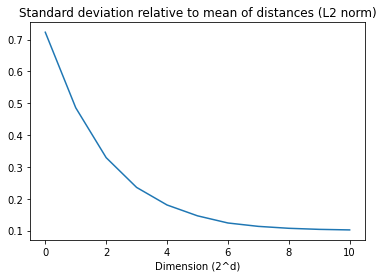

In [11]:
# Std/mean l2
plt.plot(stds_l2 / means_l2)
plt.title("Standard deviation relative to mean of distances (L2 norm)")
plt.xlabel("Dimension (2^d)")
plt.show

## Question 2. Decision Trees

In [12]:
%pip uninstall scikit-learn -y

%pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import tree
print(sklearn.__version__)

1.2.1


In [14]:
text = ["The quick brown fox jumped over the lazy dog\n"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
print(vectorizer.vocabulary_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [15]:
with open('clean_real.txt') as f:
  real = f.readlines()

with open('clean_fake.txt') as f:
  fake = f.readlines()

In [16]:
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(real + fake)
vector.shape

(3266, 5799)

In [17]:
# We will split into three by calling train_test_split twice
labels = ['real'] * len(real) + ['fake'] * len(fake)
X_train, X_test, y_train, y_test = train_test_split(vector.toarray(), labels, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [18]:
def load_data():
  with open('clean_real.txt') as f:
    real = f.readlines()

  with open('clean_fake.txt') as f:
    fake = f.readlines()

  vectorizer = CountVectorizer()
  vector = vectorizer.fit_transform(real + fake)

  # We will split into three by calling train_test_split twice
  labels = ['real'] * len(real) + ['fake'] * len(fake)
  X_train, X_test, y_train, y_test = train_test_split(vector.toarray(), labels, test_size=0.3)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [19]:
def select_model(X_train, X_val, y_train, y_val):
  accuracies = np.zeros((3, 6))
  max_depths = [5, 50, 100, 200, 500, 1000]
  split_criteria = ['gini', 'entropy', 'log_loss']

  for i, md in enumerate(max_depths):
    for j, c in enumerate(split_criteria):
      clf = DecisionTreeClassifier(random_state=0, max_depth=md, criterion=c)
      clf.fit(X_train, y_train)
      yhat = clf.predict(X_val)
      accuracy = np.mean((yhat == y_val))
      accuracies[j, i] = accuracy

  print(accuracies)
  return accuracies

In [20]:
accuracies = select_model(X_train, X_val, y_train, y_val)

[[0.69795918 0.74693878 0.76122449 0.75714286 0.75714286 0.75714286]
 [0.69183673 0.75510204 0.76326531 0.76122449 0.76122449 0.76122449]
 [0.69183673 0.75510204 0.76326531 0.76122449 0.76122449 0.76122449]]


In [21]:
mean_accuracies = np.mean(accuracies, axis=0)
mean_accuracies

array([0.69387755, 0.75238095, 0.76258503, 0.75986395, 0.75986395,
       0.75986395])

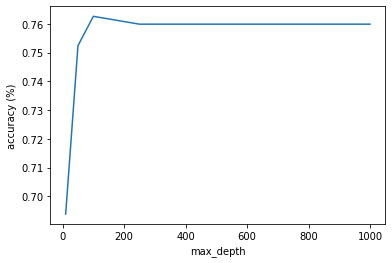

In [22]:
depths = [10, 50, 100, 250, 500, 1000]
D = {depths[i]: mean_accuracies[i] for i, _ in enumerate(depths)}
plt.plot(list(D.keys()), list(D.values()))
plt.xlabel("max_depth")
plt.ylabel("accuracy (%)")
plt.show()

In [70]:
# We see that entropy and log loss are the same and they reach their maximum accuracy at max_depth = 100
clf = DecisionTreeClassifier(random_state=0, max_depth=100, criterion='entropy')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(yhat[:10])
accuracy = np.mean((yhat == y_test))
accuracy

['real' 'real' 'real' 'real' 'fake' 'fake' 'real' 'fake' 'fake' 'fake']


0.7489795918367347

[Text(0.5, 0.875, 'donald <= 0.5\nentropy = 0.968\nsamples = 2286\nvalue = [904, 1382]\nclass = real'),
 Text(0.25, 0.625, 'trumps <= 0.5\nentropy = 1.0\nsamples = 1536\nvalue = [749, 787]\nclass = real'),
 Text(0.125, 0.375, 'hillary <= 0.5\nentropy = 0.999\nsamples = 1437\nvalue = [747, 690]\nclass = fake'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'fame <= 0.5\nentropy = 0.143\nsamples = 99\nvalue = [2, 97]\nclass = real'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'the <= 0.5\nentropy = 0.735\nsamples = 750\nvalue = [155, 595]\nclass = real'),
 Text(0.625, 0.375, 'de <= 0.5\nentropy = 0.638\nsamples = 662\nvalue = [107, 555]\nclass = real'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'trump <= 0.5\nentropy = 0.994\nsamples = 88\nvalue = [48, 40]\nclass = fake'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.1

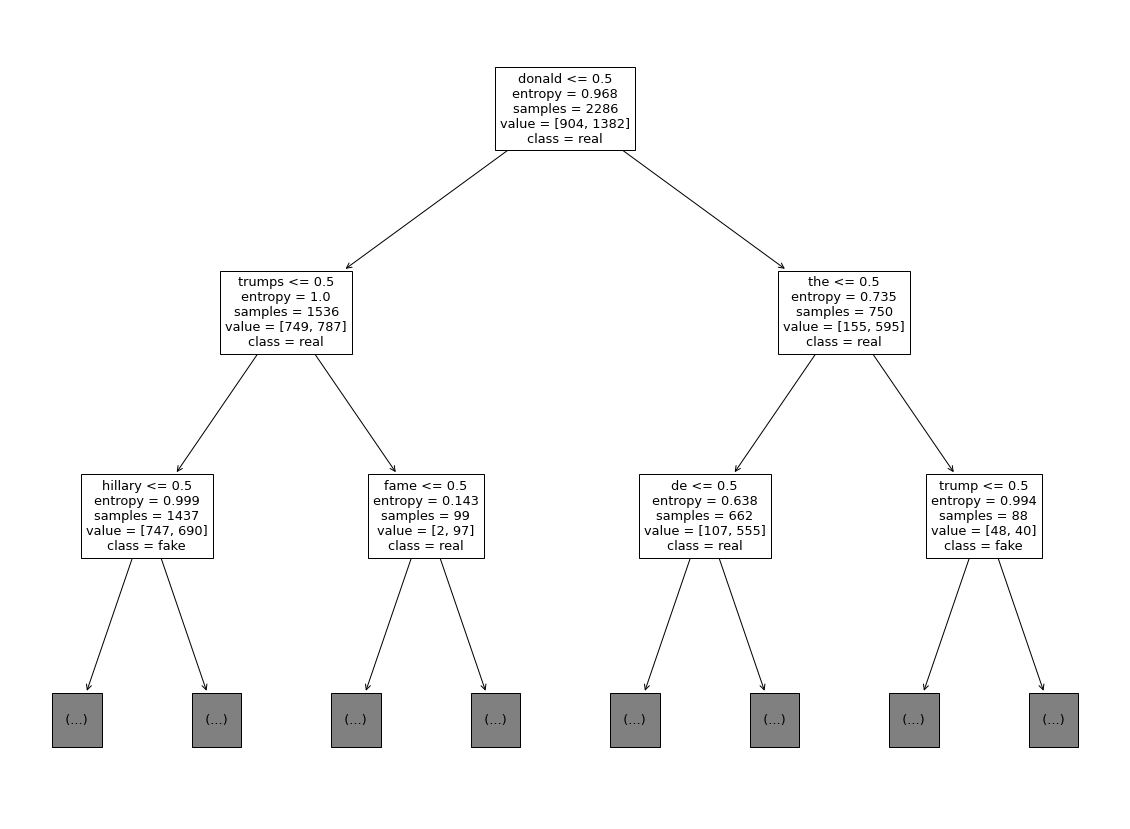

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
# If true, left, else right.
plot_tree(clf, max_depth=2, class_names=['fake', 'real'], feature_names=vectorizer.get_feature_names_out())

In [65]:
def calc_entropy(px, py):
  return -(px * np.log2(px) + py * np.log2(py))

def node_entropy(values):
  # values is a tuple (fake, real)

  fake, real = values
  pfake, preal = fake / (fake + real), real / (fake + real)
  Y_entropy = calc_entropy(pfake, preal)
  return Y_entropy

In [115]:
def wrong_compute_information_gain(word):
  tree_ = clf.tree_

  idx = vectorizer.vocabulary_[word]
  tree_idx = np.where(tree_.feature == idx)[0][0] # take first instance
  n = tree_.n_node_samples[tree_idx]
  Y_entropy = node_entropy(tree_.value[tree_idx][0])

  print(Y_entropy, tree_.children_left[tree_idx])

  left_child = tree_.children_left[tree_idx]
  right_child = tree_.children_right[tree_idx]

  left_n = tree_.n_node_samples[left_child]
  right_n = tree_.n_node_samples[right_child]

  left_entropy = node_entropy(tree_.value[left_child][0])
  right_entropy = node_entropy(tree_.value[right_child][0])

  split_entropy = (left_n / n) * left_entropy + (right_n / n) * right_entropy # entropy given the split
  print(split_entropy)
  return Y_entropy - split_entropy

In [116]:
wrong_compute_information_gain('donald')

0.9682270598855618 1
0.9127816314923088


0.05544542839325295

In [139]:
def compute_information_gain(word):
  try:
    idx = vectorizer.vocabulary_[word]
  except:
    return

  # gets headlines that does not contain {word}
  indices = np.where(X_train[:, idx] == 0)[0]
  true_y = [y_train[i] for i in indices]
  false_y = list(np.delete(y_train, indices))

  # samples that do not contain {word}
  sub_true = X_train[indices, :]
  t_fake = true_y.count('fake')
  t_real = true_y.count('real')

  # samples that do
  sub_false = np.delete(X_train, indices, 0)
  f_fake = false_y.count('fake')
  f_real = false_y.count('real')

  Y_entropy = node_entropy(
      (y_train.count('fake'),
      y_train.count('real'))
  )

  print(Y_entropy)

  left_entropy = node_entropy((t_fake, t_real))
  right_entropy = node_entropy((f_fake, f_real))
  left_n = len(sub_true)
  right_n = len(sub_false)
  n = len(X_train)
  print(t_fake, t_real, left_n)
  print(f_fake, f_real, right_n)

  split_entropy = (left_n / n) * left_entropy + (right_n / n) * right_entropy # entropy given the split
  print(split_entropy)
  return Y_entropy - split_entropy

In [140]:
compute_information_gain('s')